# K-means y Fuzzy k-means
(reimplementados porque para variar perdí mis respaldos)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial import distance

# Creacion del dataset de prueba
vamos a crear un par de blobs para ver que funcione el algoritmo

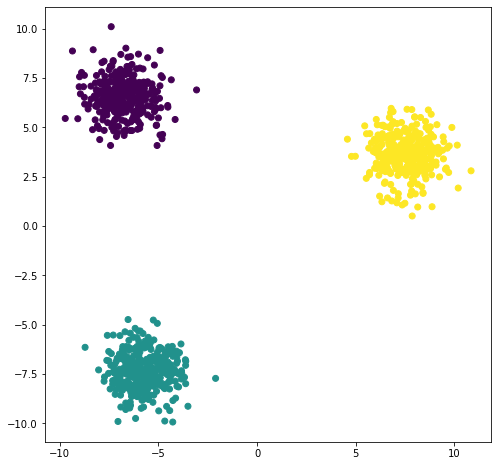

In [2]:
X,Y = make_blobs(n_samples=1000,
                 n_features=2,
                 centers=3)

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=Y)

## K means
good ol'fashioned kmeans cluster algorithm

In [3]:
#Parametros
n_clusters = 3
max_iters = 200
error=1e-6
random_seed = 348


In [4]:
#Inicializar centroides escogiendo 3 puntos aleatorios
ix_cent= np.random.choice(np.arange(len(X)), size=n_clusters, replace=False)
centroides = X[ix_cent]
print(centroides)

[[ 7.21907236  3.36110421]
 [-6.05731748  5.91464162]
 [-4.33383874 -7.50923692]]


In [5]:
#funciones
def calc_dist(X, centroide, n_clusters=3):
    dists = np.zeros((X.shape[0], n_clusters))
    for cluster in range(n_clusters):
        row_norm = np.linalg.norm(X - centroides[cluster,:], axis=1)
        dists[:,cluster] = np.square(row_norm)
    return dists

def calc_centroid(X, labels, n_clusters=3):
    centroids = np.zeros((n_clusters, X.shape[1]))
    for cluster in range(n_clusters):
        centroids[cluster, :] = np.mean(X[labels == cluster,:], axis=0)
    return centroids

#test
dists = calc_dist(X, centroides)

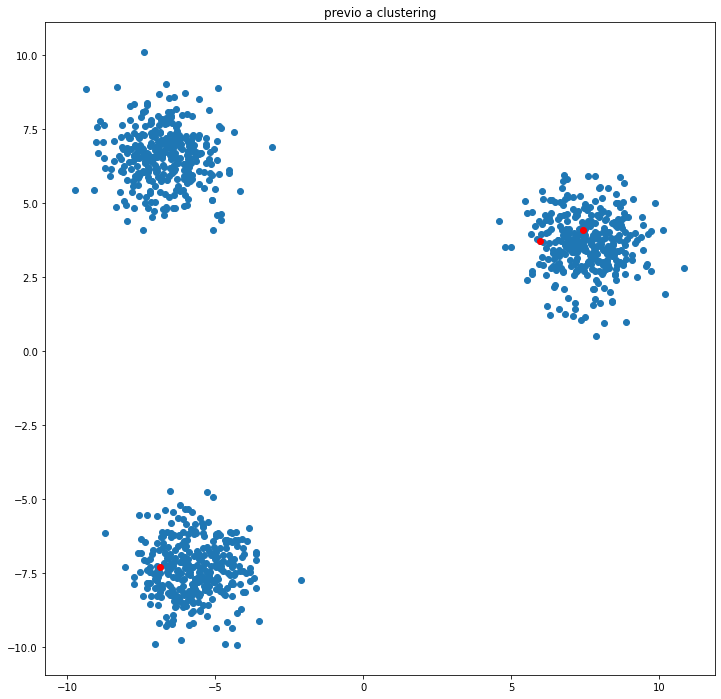

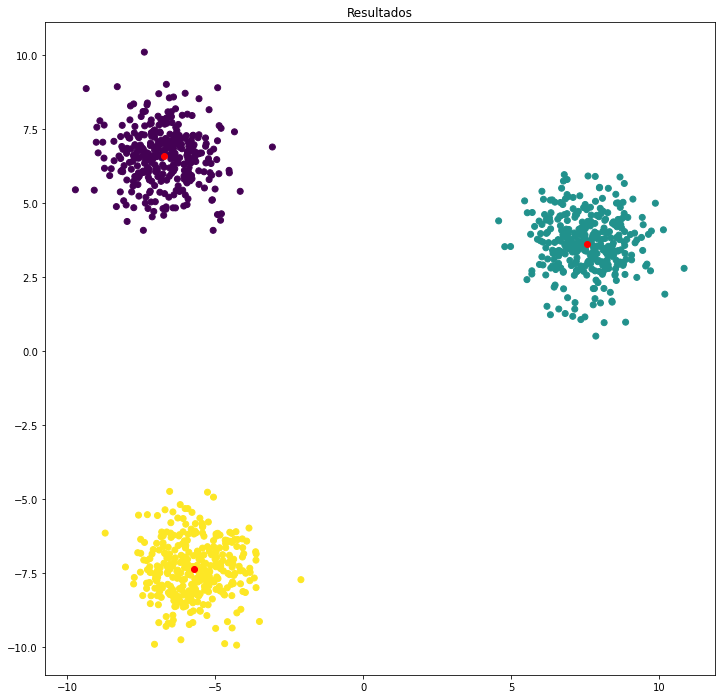

In [6]:
#Ciclo
ix_cent= np.random.choice(np.arange(len(X)), size=n_clusters, replace=False)
centroides = X[ix_cent]

fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.set_title("previo a clustering")
ax1.scatter(X[:,0], X[:,1])
ax1.scatter(centroides[:,0], centroides[:,1], c="red")


for i in range(max_iters):
    old_centroid = centroides.copy()
    dists = calc_dist(X, old_centroid, n_clusters=n_clusters)
    closest = np.argmin(dists, axis=1)
    centroides = calc_centroid(X, closest)
    if np.all(old_centroid == centroides):
        break

fig2, ax2 = plt.subplots(figsize=(12,12))
ax2.set_title("Resultados")
ax2.scatter(X[:,0], X[:,1], c=closest)
ax2.scatter(centroides[:,0], centroides[:,1], c="red")


# Fuzzy k-means
Ahora toca implementar la version fuzzy

In [7]:
#Parametros
n_clusters = 3
max_iters = 200
error=1e-6
random_seed = 348
m=2 #1.25 < m < 2

In [8]:
u = np.random.uniform(size=(len(X), n_clusters))
u = u/(np.tile(u.sum(axis=1)[np.newaxis].T, n_clusters))

In [9]:
prev_u = u.copy()

In [10]:
def next_centers(X, u, m):
    um = u ** m
    out = (X.T @ um / np.sum(um, axis=0)).T
    #@ es multiplicador de matriz. Equivalente (np.matmul(X.T, um) / np.sum(um, axis=0)).T
    return out

centers = next_centers(X, u, m)
print(centers)

[[-1.76993225  0.65437003]
 [-1.80512503  1.05557572]
 [-1.39358654  1.08685701]]


In [20]:
def get_fuzzy_partition(X, centers, m):
    temp = distance.cdist(X, centers) ** float(2/(m - 1))
    denom_ = temp.reshape(X.shape[0], 1, -1).repeat(temp.shape[-1], axis=1)
    denom_ = temp[:, :, np.newaxis] / denom_
    return 1 / denom_.sum(2)

denom = get_fuzzy_partition(X, centers, m)
print(denom)


[[0.3537296  0.32739544 0.31887497]
 [0.3233373  0.32513751 0.35152519]
 [0.35398998 0.32920794 0.31680208]
 ...
 [0.32080311 0.34989326 0.32930363]
 [0.32078815 0.32507008 0.35414177]
 [0.31574092 0.32724084 0.35701824]]


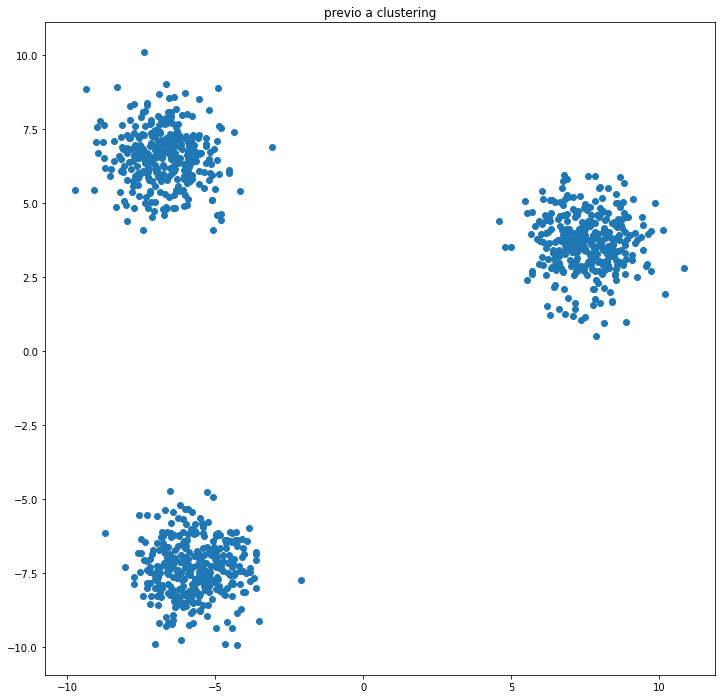

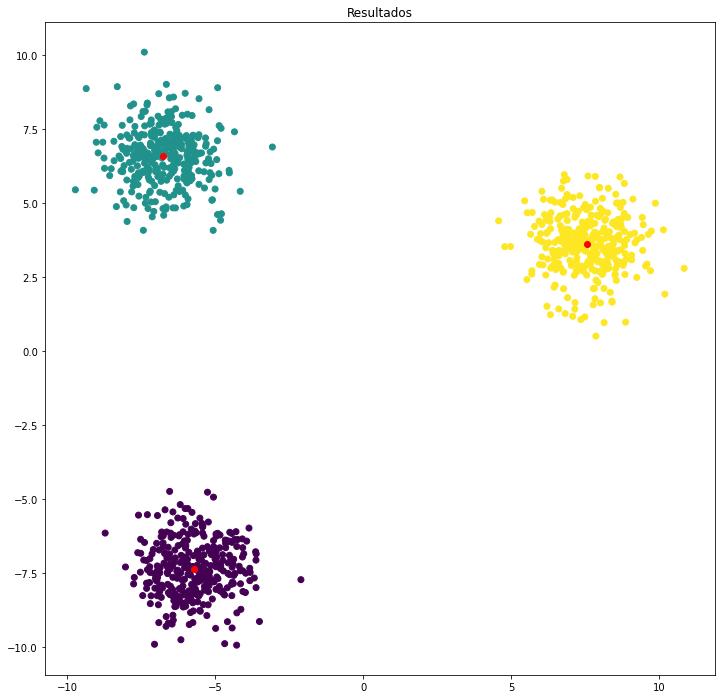

In [27]:
#ciclo
u = np.random.uniform(size=(len(X), n_clusters))
u = u/(np.tile(u.sum(axis=1)[np.newaxis].T, n_clusters))

fig1, ax1 = plt.subplots(figsize=(12,12))
ax1.set_title("previo a clustering")
ax1.scatter(X[:,0], X[:,1])
#ax1.scatter(centroides[:,0], centroides[:,1], c="red")

for i in range(max_iters):
    prev_u = u.copy()
    centers = next_centers(X, u, m)
    u = get_fuzzy_partition(X, centers, m)
    #detencion
    if np.linalg.norm(u - prev_u) < error:
        break
        
fig2, ax2 = plt.subplots(figsize=(12,12))
ax2.set_title("Resultados")
ax2.scatter(X[:,0], X[:,1], c=u.argmax(-1))
ax2.scatter(centers[:,0], centers[:,1], c="red")